In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/Users/cyrilukwajiunor/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
a_hhold_train = pd.read_csv("data/A_hhold_train.csv", index_col='id')
#b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')
#c_hhold_train = pd.read_csv("data/C_hhold_train.csv", index_col='id')

In [3]:
a_hhold_train.head()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
46107,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,XAmOF,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,LPtkN,vkbkA,qQxrL,AITFl,aQeIm,A
82739,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,lwCkE,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
9646,JhtDR,GUusz,BIZns,ZYabk,uxuSS,PHMVg,NDTCU,sehIp,qNABl,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
10975,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,sPNOc,MwLvg,...,JqHnW,MaXfS,USRak,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
16463,JhtDR,alLXR,TuovO,ZYabk,feupP,PHMVg,NDTCU,cLAGr,NdlDR,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,GAZGl,aQeIm,A


In [4]:
a_hhold_train.tail()

,wBXbHZmp,SlDKnCuu,KAJOWiiw,DsKacCdL,rtPrBBPl,tMJrvvut,jdetlNNF,maLAYXwi,vwpsXRGk,sArDRIyX,...,sDGibZrP,CsGvKKBJ,OLpGAaEu,LrDrWRjC,JCDeZBXq,HGPWuGlV,GDUPaBQs,WuwrCsIY,AlDbXTlZ,country
id,,,,,,,,,,,,,,,,,,,,,
45288,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,vVbnO,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,aQeIm,A
65081,JhtDR,GUusz,BIZns,ZYabk,feupP,PHMVg,NDTCU,cLAGr,hmAUm,MwLvg,...,JqHnW,MaXfS,etZsD,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
34370,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,PUBDZ,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
12297,JhtDR,GUusz,TuovO,ZYabk,feupP,PHMVg,NDTCU,sehIp,bUhyU,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A
39832,JhtDR,alLXR,BIZns,ZYabk,feupP,PHMVg,NDTCU,sehIp,QRKWz,MwLvg,...,JqHnW,MaXfS,HxnJy,idRwx,UyAms,vkbkA,qQxrL,AITFl,cecIq,A


In [5]:
a_hhold_train.loc[:16463,['country', 'poor']]

,country,poor
id,,
46107,A,False
82739,A,False
9646,A,True
10975,A,True
16463,A,True


In [6]:
a_hhold_train.iloc[:, 2].unique()

array(['TuovO', 'BIZns', 'rqUAG'], dtype=object)

In [7]:
a_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8203 entries, 46107 to 39832
Columns: 345 entries, wBXbHZmp to country
dtypes: bool(1), float64(2), int64(2), object(340)
memory usage: 21.9+ MB


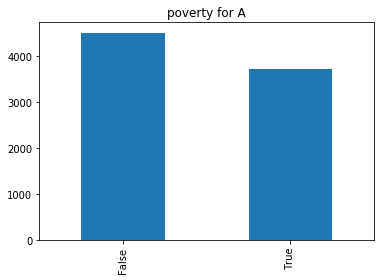

In [8]:
a_hhold_train.poor.value_counts().plot.bar(title="poverty for A")

In [9]:
def stan(df):
    '''
    Function to standardze dataframe. 
    '''
    numeric = df.select_dtypes(include=["float64", "int64"])
    df[numeric.columns] = (numeric - numeric.mean()) / numeric.std()
    return df

In [10]:
def pre_process_data(df, enforce_cols=None):
    print("input shape\t{}".format(df.shape))
    
    # standardize numerical columns of dataframe
    df = stan(df)
    print("After standardization\t{}".format(df.shape))
    
    # get one hot encoding for categorical variables
    df = pd.get_dummies(df)
    print("After one hot encoding of categoricals\t{}".format(df.shape))
    
    # match training and test set
    if enforce_cols is not None:
        to_drop = np.setdiff1d(df.columns, enforce_cols)
        to_add = np.setdiff1d(enforce_cols, df.columns)
        
        df.drop(to_drop, axis=1, inplace=True)
        df = df.assign(**{c: 0 for c in to_add})
    
    # fill all Nan values in dataset with zeros
    df.fillna(0, inplace=True)
    
    return df

In [11]:
# testing the pre process function
print('country A')

a_trainX = pre_process_data(a_hhold_train.drop('poor', axis=1))
a_trainY = np.ravel(a_hhold_train.poor)

country A
input shape	(8203, 344)
After standardization	(8203, 344)
After one hot encoding of categoricals	(8203, 859)


In [12]:
a_trainX.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq,country_A
id,,,,,,,,,,,,,,,,,,,,,
46107,-1.447160,0.325746,1.099716,-0.628045,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,1
82739,-0.414625,-0.503468,-0.016050,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
9646,0.617910,-0.503468,-0.016050,-0.628045,0,1,1,0,1,0,...,1,0,1,0,1,1,0,0,1,1
10975,0.617910,-1.332682,-1.131816,0.713467,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
16463,0.617910,0.325746,-1.131816,-0.180874,0,1,0,1,0,1,...,1,0,1,0,1,0,1,1,0,1


In [15]:
#a_trainX1 = a_trainX.iloc[:7000, :]
a_trainX1.shape

(7000, 859)

In [18]:
#a_validateX = a_trainX.iloc[7000:, :]
print(a_validateX.shape)
a_validateX.head()

(1203, 859)


,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,JCDeZBXq_UyAms,HGPWuGlV_WKNwg,HGPWuGlV_vkbkA,GDUPaBQs_qCEuA,GDUPaBQs_qQxrL,WuwrCsIY_AITFl,WuwrCsIY_GAZGl,AlDbXTlZ_aQeIm,AlDbXTlZ_cecIq,country_A
id,,,,,,,,,,,,,,,,,,,,,
52643,-3.512229,0.325746,1.099716,-0.180874,0,1,0,1,0,1,...,0,1,0,0,1,1,0,1,0,1
95388,-0.414625,1.154960,-1.131816,-0.628045,0,1,1,0,0,1,...,1,0,1,0,1,1,0,0,1,1
38902,-0.414625,1.154960,4.447014,-0.628045,0,1,1,0,0,1,...,1,0,1,0,1,1,0,1,0,1
18599,0.617910,2.813388,1.099716,-1.075215,0,1,0,1,1,0,...,0,0,1,0,1,1,0,0,1,1
50700,-1.447160,2.813388,-0.016050,-1.522386,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,1


In [20]:
a_trainY1 = a_trainY[:7000]
a_trainY1.shape

(7000,)

In [21]:
a_validateY = a_trainY[7000:]
a_validateY.shape

(1203,)

# ISSUES BEFORE BUILDING MODEL
1. How to deal with unbalanced datasets B and C
2. How to fill in missing values especially for B

In [22]:
# trial model for A
import tensorflow as tf

In [23]:
def initialize_parameters():
    '''inintialize the parameters for the 3 layer neural network'''
    W1 = tf.get_variable("W1", [30,859], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b1 = tf.get_variable("b1", [30,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [15,30], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b2 = tf.get_variable("b2", [15,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [1,15], initializer = tf.contrib.layers.xavier_initializer(dtype=tf.float64))
    b3 = tf.get_variable("b3", [1,1], initializer = tf.zeros_initializer())
    
    parameters = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    return parameters

In [24]:
def predict(parameters, X):
    '''compute the forward pass of the neural network'''
    Z1 = tf.add(tf.matmul(parameters["W1"], X), parameters["b1"])
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(parameters["W2"], Z1), parameters["b2"])
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(parameters["W3"], Z2), parameters["b3"])
    #A3 = tf.nn.sigmoid(Z3)
    
    #thresh = tf.Variable(0.0, name='thresh')
    #result = tf.cond(A3 < thresh, lambda: tf.multiply(A3, thresh), lambda: tf.div(A3, A3))
    return Z3

In [25]:
def make_placeholder(num_x, num_y):
    X = tf.placeholder('float', [num_x, None])
    Y = tf.placeholder('float', [num_y, None])
    
    return X, Y
    

In [26]:
def get_cost(Z3, Y):
    '''compute the cost function after an iteration'''
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=Z3, labels=Y))
    return cost

In [75]:
def fit(xtrain, ytrain, x_val, y_val, alpha=0.001, epochs=1000):
    '''function which does the training of the model'''
    
    tf.reset_default_graph()
    tf.set_random_seed(1)
    (num_x, m) = xtrain.shape
    num_y = ytrain.shape[0]
    costs = []
    
    X, Y = make_placeholder(num_x, num_y)
    
    parameters = initialize_parameters()
    
    z = predict(parameters, X)
    
    cost = get_cost(z, Y)
    
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=alpha).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(epochs):
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: xtrain, Y: ytrain})
            costs.append(temp_cost)
            
            if(epoch%100 == 0):
                print("At Epoch {0}, Cost is {1}".format(epoch, temp_cost))
        
        parameters = sess.run(parameters)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(alpha))
        plt.show()

        # Calculate accuracy on the train set
        accuracy = get_cost(z, Y)

        print("Train Accuracy:", accuracy.eval({X: xtrain, Y: ytrain}))
        print("Validation Accuracy:", accuracy.eval({X: x_val, Y: y_val}))
        
        
        return parameters

In [28]:
a_trainX1 = a_trainX1.transpose()

In [29]:
a_trainX1.head()

id,46107,82739,9646,10975,16463,98438,84763,96788,49696,9346,...,75855,59897,85097,63558,54325,90279,14719,92512,40609,13452
nEsgxvAq,-1.447160,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,-0.414625,0.617910,...,0.617910,0.617910,0.617910,0.617910,-0.414625,0.617910,-0.414625,-1.447160,-1.447160,0.617910
OMtioXZZ,0.325746,-0.503468,-0.503468,-1.332682,0.325746,-0.503468,0.325746,-0.503468,1.154960,0.325746,...,0.325746,-1.332682,-1.332682,0.325746,-0.503468,-0.503468,1.154960,0.325746,1.154960,-0.503468
YFMZwKrU,1.099716,-0.016050,-0.016050,-1.131816,-1.131816,-0.016050,-1.131816,-0.016050,1.099716,-1.131816,...,-1.131816,-0.016050,-0.016050,-1.131816,-0.016050,-0.016050,-0.016050,1.099716,1.099716,-0.016050
TiwRslOh,-0.628045,0.713467,-0.628045,0.713467,-0.180874,0.713467,1.160637,0.266296,0.713467,-1.075215,...,0.266296,0.713467,1.607808,-0.180874,0.713467,0.713467,1.160637,0.713467,-2.416726,1.160637
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
a_validateX = a_validateX.transpose()

In [32]:
a_validateX.head()

id,52643,95388,38902,18599,50700,81296,54954,91655,82113,93604,...,59935,24606,391,19571,45476,45288,65081,34370,12297,39832
nEsgxvAq,-3.512229,-0.414625,-0.414625,0.617910,-1.447160,-2.479695,0.617910,0.617910,0.617910,0.617910,...,-0.414625,0.617910,-0.414625,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910,0.617910
OMtioXZZ,0.325746,1.154960,1.154960,2.813388,2.813388,0.325746,-0.503468,-0.503468,-2.161895,-0.503468,...,0.325746,1.154960,0.325746,-0.503468,0.325746,0.325746,-0.503468,-0.503468,1.154960,-0.503468
YFMZwKrU,1.099716,-1.131816,4.447014,1.099716,-0.016050,-0.016050,1.099716,-1.131816,-0.016050,-1.131816,...,1.099716,1.099716,-1.131816,-0.016050,-0.016050,-0.016050,-1.131816,-1.131816,1.099716,1.099716
TiwRslOh,-0.180874,-0.628045,-0.628045,-1.075215,-1.522386,-1.075215,1.160637,0.713467,1.160637,1.160637,...,0.713467,-1.075215,-1.075215,0.266296,0.266296,0.266296,1.607808,1.607808,-0.628045,0.713467
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
a_trainY1 = a_trainY1.reshape(7000,1)

In [40]:
a_trainY1 = a_trainY1.transpose()

In [42]:
a_trainY1.shape

(1, 7000)

In [43]:
a_validateY = a_validateY.reshape(1203, 1)
a_validateY = a_validateY.transpose()
a_validateY.shape

(1, 1203)

At Epoch 0, Cost is 0.7214401364326477
At Epoch 100, Cost is 0.6432081460952759
At Epoch 200, Cost is 0.5996688604354858
At Epoch 300, Cost is 0.5692364573478699
At Epoch 400, Cost is 0.5462852716445923
At Epoch 500, Cost is 0.5279817581176758
At Epoch 600, Cost is 0.512760579586029
At Epoch 700, Cost is 0.49969419836997986
At Epoch 800, Cost is 0.4881993234157562
At Epoch 900, Cost is 0.47789397835731506
At Epoch 1000, Cost is 0.4685177803039551
At Epoch 1100, Cost is 0.45988765358924866
At Epoch 1200, Cost is 0.4518710970878601
At Epoch 1300, Cost is 0.4443719685077667
At Epoch 1400, Cost is 0.43731701374053955
At Epoch 1500, Cost is 0.43064969778060913
At Epoch 1600, Cost is 0.42432665824890137
At Epoch 1700, Cost is 0.41831347346305847
At Epoch 1800, Cost is 0.4125819504261017
At Epoch 1900, Cost is 0.4071097671985626
At Epoch 2000, Cost is 0.4018780589103699
At Epoch 2100, Cost is 0.3968707323074341
At Epoch 2200, Cost is 0.3920741379261017
At Epoch 2300, Cost is 0.387476772069931

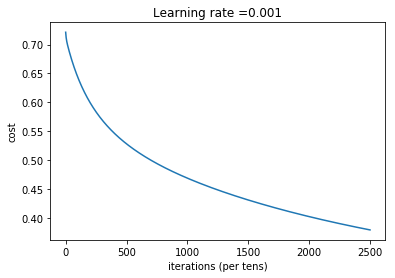

Train Accuracy: 0.37883684
Validation Accuracy: 0.3972441


In [46]:
A_params = fit(a_trainX1, a_trainY1, a_validateX, a_validateY, epochs=1000)

In [47]:
def predict_final(parameters, X):
    '''compute the class probability of the neural network given the trained model params'''
    num_xtest = X.shape[0]
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1":W1, "b1":b1, "W2":W2, "b2":b2, "W3":W3, "b3":b3}
    
    x_test = tf.placeholder('float', [num_xtest, None])
    Z = predict(params, x_test)
    A = tf.nn.sigmoid(Z)
    
    with tf.Session() as sess:
        predictions = sess.run(A, feed_dict={x_test:X})
    return predictions

In [48]:
a_val_preds = predict_final(A_params, a_validateX)

In [58]:
val_score = (a_validateY * np.log(a_val_preds)) + ((1 - a_validateY) * np.log(1 - a_val_preds))
val_score_m = -1 * np.mean(val_score)

In [59]:
val_score_m

0.39724409649949266

In [76]:
a_test = pd.read_csv("data/A_hhold_test.csv", index_col='id')

In [77]:
a_trainX.columns

Index(['nEsgxvAq', 'OMtioXZZ', 'YFMZwKrU', 'TiwRslOh', 'wBXbHZmp_DkQlr',
       'wBXbHZmp_JhtDR', 'SlDKnCuu_GUusz', 'SlDKnCuu_alLXR', 'KAJOWiiw_BIZns',
       'KAJOWiiw_TuovO',
       ...
       'JCDeZBXq_UyAms', 'HGPWuGlV_WKNwg', 'HGPWuGlV_vkbkA', 'GDUPaBQs_qCEuA',
       'GDUPaBQs_qQxrL', 'WuwrCsIY_AITFl', 'WuwrCsIY_GAZGl', 'AlDbXTlZ_aQeIm',
       'AlDbXTlZ_cecIq', 'country_A'],
      dtype='object', length=859)

In [78]:
a_test = pre_process_data(a_test, enforce_cols=a_trainX.columns)

input shape	(4041, 344)
After standardization	(4041, 344)
After one hot encoding of categoricals	(4041, 851)


In [79]:
a_test.head()

,nEsgxvAq,OMtioXZZ,YFMZwKrU,TiwRslOh,wBXbHZmp_DkQlr,wBXbHZmp_JhtDR,SlDKnCuu_GUusz,SlDKnCuu_alLXR,KAJOWiiw_BIZns,KAJOWiiw_TuovO,...,AlDbXTlZ_cecIq,country_A,LjvKYNON_tFrTi,UjuNwfjv_ACFXG,UjuNwfjv_ZBMyY,UjuNwfjv_ujWYB,nKoaotpH_HQYUq,nSzbETYS_yTPHV,tHFrzjai_MkATH,tHFrzjai_xBZqe
id,,,,,,,,,,,,,,,,,,,,,
418,0.580509,-0.519164,-0.027227,-1.095034,0,1,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0
41249,0.580509,1.183020,1.062118,0.730851,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
16205,-0.361216,0.331928,1.062118,-1.551505,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
97501,0.580509,1.183020,1.062118,1.643794,0,1,0,1,1,0,...,1,1,0,0,0,0,0,0,0,0
67756,-1.302941,1.183020,-0.027227,-0.638563,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [80]:
a_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4041 entries, 418 to 43344
Columns: 859 entries, nEsgxvAq to tHFrzjai_xBZqe
dtypes: float64(4), int64(8), uint8(847)
memory usage: 3.7 MB


In [81]:
a_test = a_test.transpose()
a_test.head()

id,418,41249,16205,97501,67756,17938,19036,61587,57571,64203,...,6778,177,59498,73802,96606,7289,10950,3346,50755,43344
nEsgxvAq,0.580509,0.580509,-0.361216,0.580509,-1.302941,-1.302941,-1.302941,0.580509,0.580509,-0.361216,...,0.580509,0.580509,0.580509,-1.302941,0.580509,0.580509,0.580509,0.580509,0.580509,-0.361216
OMtioXZZ,-0.519164,1.183020,0.331928,1.183020,1.183020,1.183020,1.183020,-0.519164,-0.519164,-1.370256,...,-1.370256,1.183020,-0.519164,2.034112,0.331928,-0.519164,1.183020,-0.519164,-0.519164,1.183020
YFMZwKrU,-0.027227,1.062118,1.062118,1.062118,-0.027227,1.062118,-0.027227,-1.116572,-0.027227,-0.027227,...,1.062118,1.062118,-1.116572,1.062118,1.062118,-1.116572,-0.027227,-1.116572,-0.027227,-0.027227
TiwRslOh,-1.095034,0.730851,-1.551505,1.643794,-0.638563,-0.182091,0.730851,0.274380,0.730851,0.730851,...,0.274380,-0.182091,0.730851,-1.095034,-0.638563,1.187322,-0.182091,-0.638563,1.643794,-1.095034
wBXbHZmp_DkQlr,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [82]:
A_pred = predict_final(A_params, a_test)

In [83]:
A_pred

array([[0.04244093, 0.03111807, 0.21982276, ..., 0.0716027 , 0.00955285,
        0.05020028]], dtype=float32)

In [84]:
A_pred = A_pred.flatten()
A_pred.shape

(4041,)

In [85]:
a_id = a_test.columns.tolist()

In [86]:
A = pd.DataFrame(data={'id':a_id, 'poor':A_pred})

In [87]:
A.set_index('id', inplace=True)
A.head()

,poor
id,
418,0.042441
41249,0.031118
16205,0.219823
97501,0.006791
67756,0.074908


In [88]:
A['country'] = 'A'
A = A[['country', 'poor']]

In [89]:
A

,country,poor
id,,
418,A,0.042441
41249,A,0.031118
16205,A,0.219823
97501,A,0.006791
67756,A,0.074908
17938,A,0.046899
19036,A,0.006498
61587,A,0.044180
57571,A,0.024784


In [91]:
B = pd.read_csv('B2.csv', index_col='id')

In [96]:
C = pd.read_csv('C2.csv', index_col='id')

In [97]:
submission = pd.concat([A, B, C])

In [98]:
submission.head()

,country,poor
id,,
418,A,0.042441
41249,A,0.031118
16205,A,0.219823
97501,A,0.006791
67756,A,0.074908


In [99]:
submission.tail()

,country,poor
id,,
6775,C,0.596847
88300,C,0.500719
35424,C,0.096832
81668,C,0.516915
98377,C,0.177465


In [100]:
submission.to_csv('submission3.csv')